Importing Required Libraries    

In [95]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [96]:
#Loading the data
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


As we can see Attrition is our target variable and rest are feature variables. We are having categorical data also in our dataset so we will perform Classification to solve this problem.

In [97]:
#Performing EDA
df.shape  #shape of our dataset

(1470, 35)

In [98]:
#basic ifnormation of dataset
df.info  

<bound method DataFrame.info of       Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education Education

In [99]:
#data types of all columns
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [100]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [101]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [102]:
#Exploring Data Variable
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [103]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Exploring Data Visualization

In [104]:
#checking null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

We are glad to see that there are no null values in our dataset.

Analysis of Feautures

Removing Useless Features

1. *StandardHours*
1. *EmployeeCount*
1. *Over18*
1. *EmployeeNumber*
1. *StockOptionLevel*

In [105]:
df = df.drop(columns=['StandardHours','EmployeeCount','Over18','EmployeeNumber','StockOptionLevel'])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,11,3,1,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,15,3,2,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,11,3,3,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,12,3,4,6,3,3,2,2,2,2


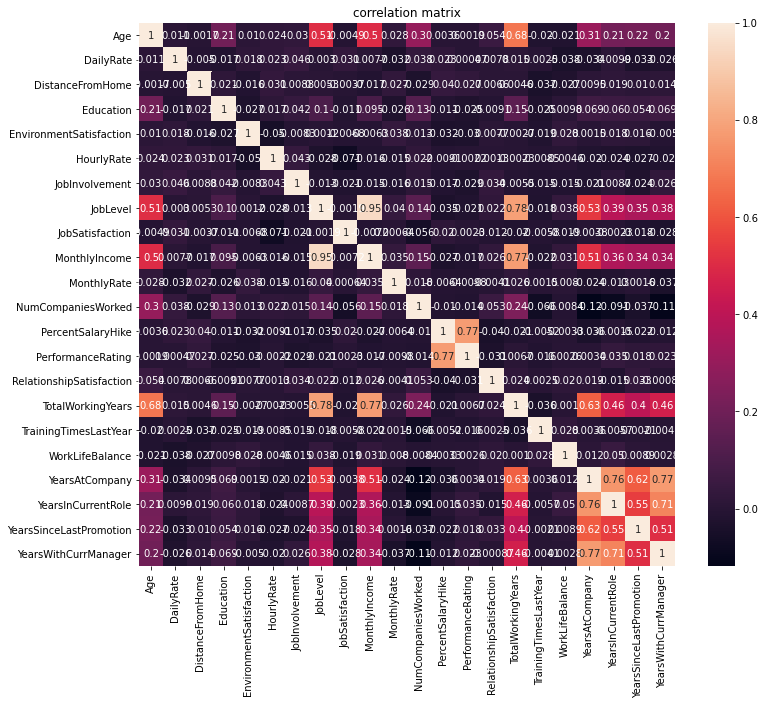

In [106]:
#Checking Correlation
dfcor=df.corr()
plt.figure(figsize=[12,10])
sns.heatmap(dfcor,annot=True)
plt.title("correlation matrix")
plt.show()

In [109]:
dfcor=df.corr()
dfcor

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.003634,0.001904,0.053535,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.022704,0.000473,0.007846,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.040235,0.027110,0.006557,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.011111,-0.024539,-0.009118,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.031701,-0.029548,0.007665,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.009062,-0.002172,0.001330,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.017205,-0.029071,0.034297,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.034730,-0.021222,0.021642,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.020002,0.002297,-0.012454,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.027269,-0.017120,0.025873,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<AxesSubplot:>

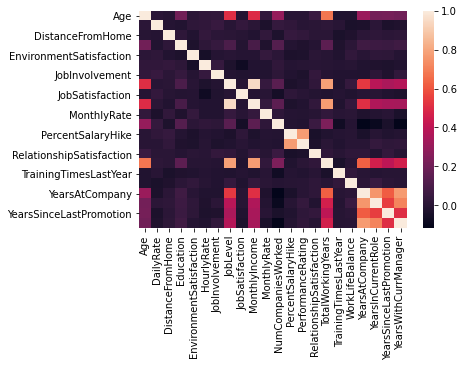

In [110]:
sns.heatmap(dfcor)

The Dataset is co-related to each other.

In [111]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [112]:
#Dropping the columns
df = df.drop(columns=['BusinessTravel','Department','EducationField','JobRole'])
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1102,1,2,2,Female,94,3,2,...,11,3,1,8,0,1,6,4,0,5
1,49,No,279,8,1,3,Male,61,2,2,...,23,4,4,10,3,3,10,7,1,7
2,37,Yes,1373,2,2,4,Male,92,2,1,...,15,3,2,7,3,3,0,0,0,0
3,33,No,1392,3,4,4,Female,56,3,1,...,11,3,3,8,3,3,8,7,3,0
4,27,No,591,2,1,1,Male,40,3,1,...,12,3,4,6,3,3,2,2,2,2


In [136]:
#Conveting Gender's data type from Object to int
df.replace({'Gender':{'Female':0,'Male':1}}, inplace=True)
df.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,...,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,1102,1,2,2,0,94,3,2,...,11,3,1,8,0,1,6,4,0,5
1,49,0,279,8,1,3,1,61,2,2,...,23,4,4,10,3,3,10,7,1,7
2,37,1,1373,2,2,4,1,92,2,1,...,15,3,2,7,3,3,0,0,0,0
3,33,0,1392,3,4,4,0,56,3,1,...,11,3,3,8,3,3,8,7,3,0
4,27,0,591,2,1,1,1,40,3,1,...,12,3,4,6,3,3,2,2,2,2


In [113]:
df.dtypes

Age                          int64
Attrition                   object
DailyRate                    int64
DistanceFromHome             int64
Education                    int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole           int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

Converted object data type to Integer.

Let's check the data distribution among all the columns

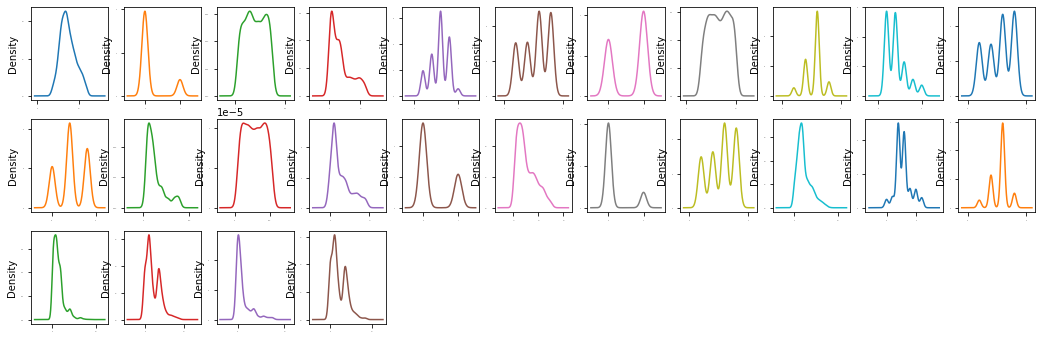

In [171]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))
plt.show()

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='D

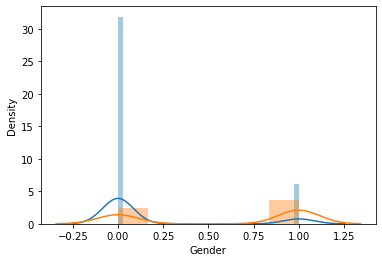

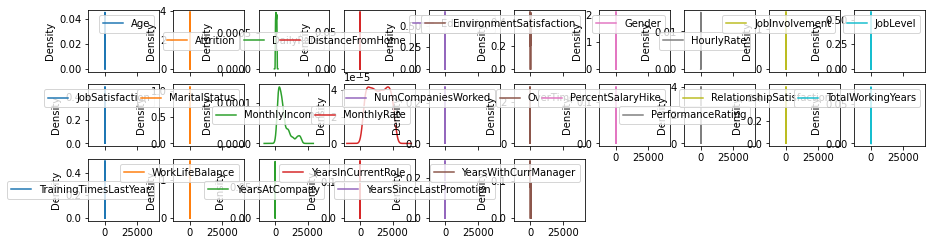

In [172]:
sns.distplot(df['Attrition'])
sns.distplot(df['Gender'])
df.plot(kind='kde',subplots=True,layout=(6,10),figsize=(15,8))

bivariate analysis 

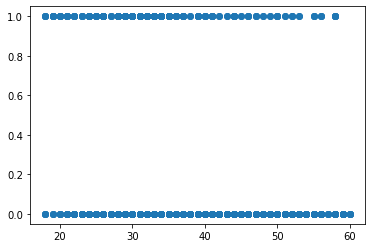

In [137]:
plt.scatter(df['Age'],df['Attrition'])

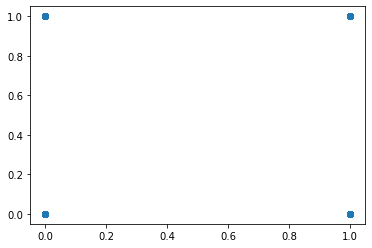

In [138]:
plt.scatter(df['Gender'],df['Attrition'])

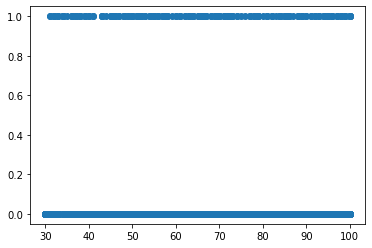

In [139]:
plt.scatter(df['HourlyRate'],df['Attrition'])

In [140]:
df.skew()

Age                         0.413286
Attrition                   1.844366
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

we can see skewness in most of the columns of our dataset. we will remove the skewness using power_transform

Plotting outliers

Age                            AxesSubplot(0.125,0.862442;0.021648x0.0175581)
Attrition                   AxesSubplot(0.150978,0.862442;0.021648x0.0175581)
DailyRate                   AxesSubplot(0.176955,0.862442;0.021648x0.0175581)
DistanceFromHome            AxesSubplot(0.202933,0.862442;0.021648x0.0175581)
Education                   AxesSubplot(0.228911,0.862442;0.021648x0.0175581)
EnvironmentSatisfaction     AxesSubplot(0.254888,0.862442;0.021648x0.0175581)
Gender                      AxesSubplot(0.280866,0.862442;0.021648x0.0175581)
HourlyRate                  AxesSubplot(0.306844,0.862442;0.021648x0.0175581)
JobInvolvement              AxesSubplot(0.332821,0.862442;0.021648x0.0175581)
JobLevel                    AxesSubplot(0.358799,0.862442;0.021648x0.0175581)
JobSatisfaction             AxesSubplot(0.384777,0.862442;0.021648x0.0175581)
MaritalStatus               AxesSubplot(0.410754,0.862442;0.021648x0.0175581)
MonthlyIncome               AxesSubplot(0.436732,0.862442;0.0216

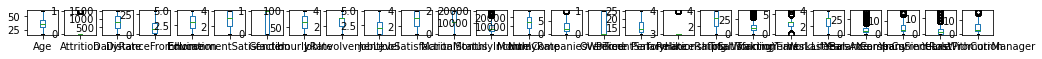

In [143]:
df.plot(kind='box',subplots=True,layout=(36,30),figsize=(20,20))

We can see we are not having such outliers in our dataset. we will proceed to our model building.

Model Building

In [144]:
#Splitting the independent and target variables in x and y before removing the skewness
x=df.drop("Attrition",axis=1)
y=df["Attrition"]

In [145]:
x.shape

(1470, 25)

In [146]:
y.shape

(1470,)

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [148]:
from sklearn import preprocessing
import math
from sklearn import metrics 
le = preprocessing.LabelEncoder()
categorial_variables = ['Attrition','Gender','MaritalStatus','OverTime']
for i in categorial_variables:
    df[i] = le.fit_transform(df[i])
df.head(5)
df.to_csv('LabelEncoded_CleanData.csv')

In [149]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [150]:
x_train.shape

(984, 25)

In [151]:
y_train.shape

(984,)

In [158]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.8559670781893004
[[416   0]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       416
           1       0.00      0.00      0.00        70

    accuracy                           0.86       486
   macro avg       0.43      0.50      0.46       486
weighted avg       0.73      0.86      0.79       486



In [153]:
#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8209876543209876
[[390  26]
 [ 61   9]]
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       416
           1       0.26      0.13      0.17        70

    accuracy                           0.82       486
   macro avg       0.56      0.53      0.54       486
weighted avg       0.78      0.82      0.79       486



In [154]:
#Support Vector Classifier
from sklearn.svm import SVC
#kernel='rbf' default
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8559670781893004
[[416   0]
 [ 70   0]]
              precision    recall  f1-score   support

           0       0.86      1.00      0.92       416
           1       0.00      0.00      0.00        70

    accuracy                           0.86       486
   macro avg       0.43      0.50      0.46       486
weighted avg       0.73      0.86      0.79       486



In [156]:
#Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8024691358024691
[[366  50]
 [ 46  24]]
              precision    recall  f1-score   support

           0       0.89      0.88      0.88       416
           1       0.32      0.34      0.33        70

    accuracy                           0.80       486
   macro avg       0.61      0.61      0.61       486
weighted avg       0.81      0.80      0.80       486



In [157]:
#Random Forest Classfier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8580246913580247
[[409   7]
 [ 62   8]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       416
           1       0.53      0.11      0.19        70

    accuracy                           0.86       486
   macro avg       0.70      0.55      0.56       486
weighted avg       0.82      0.86      0.82       486



As we can see Random Foresh Classifier has good score. now we will check the cross-validation score and select the best model.

In [159]:
from sklearn.model_selection import cross_val_score

In [162]:
score=cross_val_score(LR,x,y,cv=5)
print(score)

[0.84013605 0.84013605 0.84353741 0.84013605 0.84353741]


In [163]:
score=cross_val_score(knn,x,y,cv=5)
print(score)

[0.81972789 0.82653061 0.83673469 0.81972789 0.84013605]


In [164]:
score=cross_val_score(svc,x,y,cv=5)
print(score)

[0.83673469 0.83673469 0.84013605 0.84013605 0.84013605]


In [165]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)

[0.78911565 0.7755102  0.80952381 0.7244898  0.81292517]


In [166]:
score=cross_val_score(rf,x,y,cv=5)
print(score)

[0.85714286 0.86394558 0.86394558 0.85714286 0.86394558]


By comparing all cross validation score we can see we received the max score in Random Forest Classifier. So Random Forest Classifier is the best model to analyse the HR Attrition.

Hyper Parameter Tuning

In [167]:
from sklearn.model_selection import GridSearchCV
#Creating paramter list to pass in GridSearch CV
parameters = {'max_features':['auto','sqrt','log2'],
             'max_depth':[4,5,6,7,8],
              'criterion':['gini','entropy']}

In [168]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)  
GCV.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [169]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8641975308641975

Saving the model in pickle format

In [170]:
import joblib
joblib.dump(RandomForestClassifier,"HRAnalytics.pkl")

['HRAnalytics.pkl']